In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
#import datetime as dt

/Users/melissa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/melissa/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/melissa/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/melissa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/melissa/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/melissa/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float, and_, Date, desc, func
from sqlalchemy.sql import label

In [4]:
# Database setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Save reference to the tables
Measurement = Base.classes.measurements
Stations = Base.classes.stations

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [10]:
# Use a session query to find the first row in the database
data = session.query(Measurement).first()
data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x108f9a7f0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': '0.08',
 'station': 'USC00519397',
 'tobs': '65'}

In [11]:
# Precipitation Analysis
results_date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2017-04-01', Measurement.date < '2018-04-20').order_by(Measurement.date).group_by(Measurement.date).all()    

In [12]:
print(results_date_prcp)

[('2017-04-02', '0.0'), ('2017-04-03', '0.23'), ('2017-04-04', '0.02'), ('2017-04-05', '0.45'), ('2017-04-06', '0.0'), ('2017-04-07', '0.0'), ('2017-04-08', '0.0'), ('2017-04-09', '0.0'), ('2017-04-10', '0.0'), ('2017-04-11', '0.25'), ('2017-04-12', '0.65'), ('2017-04-13', '0.23'), ('2017-04-14', '2.82'), ('2017-04-15', '0.9'), ('2017-04-16', '0.11'), ('2017-04-17', '1.3'), ('2017-04-18', '0.98'), ('2017-04-19', '0.14'), ('2017-04-20', '0.0'), ('2017-04-21', '1.84'), ('2017-04-22', '1.35'), ('2017-04-23', '0.35'), ('2017-04-24', '0.05'), ('2017-04-25', '0.0'), ('2017-04-26', '0.22'), ('2017-04-27', '0.11'), ('2017-04-28', '0.79'), ('2017-04-29', '0.0'), ('2017-04-30', '0.8'), ('2017-05-01', '0.25'), ('2017-05-02', '0.0'), ('2017-05-03', '0.01'), ('2017-05-04', '0.0'), ('2017-05-05', '0.1'), ('2017-05-06', '0.0'), ('2017-05-07', '0.03'), ('2017-05-08', '1.11'), ('2017-05-09', '0.23'), ('2017-05-10', '0.55'), ('2017-05-11', '0.44'), ('2017-05-12', '0.1'), ('2017-05-13', '0.1'), ('2017-05

In [13]:
surfsup_date = [str(result[0]) for result in results_date_prcp[:50]]
surfsup_prcp = [float(result[1]) for result in results_date_prcp[:50]]

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from datetime import datetime

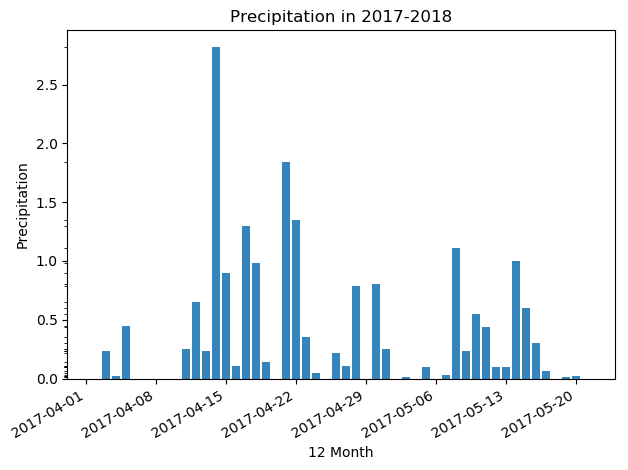

In [15]:
# Plot the Precipitation Bar Chart 
datetime_surfsup_date = [datetime.strptime(date, '%Y-%m-%d') for date in surfsup_date]

fig, ax=plt.subplots()
x_axis = datetime_surfsup_date
y_axis = surfsup_prcp
ax.set_xlabel("12 Month")
ax.set_ylabel("Precipitation")
ax.set_yticks(y_axis, range(0,3))
#ax.set_ylim(ymin=0, ymax=3)
ax.set_title("Precipitation in 2017-2018")

plt.bar(x_axis, y_axis, align='center',alpha=0.9)
plt.xticks(rotation = '45')
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.show()

In [44]:
data_prcp_stmt = session.query(Measurement).\
    filter(Measurement.date > '2016-08-01', Measurement.date < '2017-08-23').order_by(Measurement.prcp).statement
df_date_prcp2 = pd.read_sql_query(data_prcp_stmt, session.bind)
df_date_prcp2.head(10)

,id,station,date,prcp,tobs
0,2307,USC00519397,2016-08-03,0.0,80
1,2310,USC00519397,2016-08-06,0.0,80
2,2313,USC00519397,2016-08-09,0.0,80
3,2314,USC00519397,2016-08-10,0.0,80
4,2315,USC00519397,2016-08-11,0.0,80
5,2316,USC00519397,2016-08-12,0.0,79
6,2317,USC00519397,2016-08-13,0.0,79
7,2318,USC00519397,2016-08-14,0.0,79
8,2319,USC00519397,2016-08-15,0.0,79
9,2320,USC00519397,2016-08-16,0.0,80


In [45]:
# Station Analysis
# Number of stations
session.query(func.count(Stations.station)).all()

[(9)]

In [46]:
#Number of Each Station Instance
results_instance_station_total = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()
    
print(results_instance_station_total)

[('USC00511918', 1932), ('USC00513117', 2696), ('USC00514830', 1937), ('USC00516128', 2484), ('USC00517948', 683), ('USC00518838', 342), ('USC00519281', 2772), ('USC00519397', 2685), ('USC00519523', 2572)]


In [47]:
# Most active stations dataframe
df_count_stations = pd.DataFrame(data=results_instance_station_total, columns=["station","total"])
df_count_stations.sort_values("total", ascending=False)

,station,total
6,USC00519281,2772
1,USC00513117,2696
7,USC00519397,2685
8,USC00519523,2572
3,USC00516128,2484
2,USC00514830,1937
0,USC00511918,1932
4,USC00517948,683
5,USC00518838,342


In [43]:
# Station with the highest no. of observations
active_stations[:1]

[('USC00519281', 2772)]

In [31]:
# USC00519281 has greatest number of high tobs
results_high_tobs_station = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.station)).\
    filter(Measurement.tobs >=60).group_by(Measurement.station).all()
    
results_high_tobs_station

[('USC00511918', '64', 1903),
 ('USC00513117', '77', 2695),
 ('USC00514830', '82', 1935),
 ('USC00516128', '76', 2476),
 ('USC00517948', '80', 682),
 ('USC00518838', '74', 340),
 ('USC00519281', '79', 2750),
 ('USC00519397', '81', 2677),
 ('USC00519523', '82', 2564)]

In [33]:
results_high_tobs_year = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', Measurement.date >= '2017-04-01', Measurement.date <= '2018-04-20').all()
results_high_tobs_year

[('USC00519281', '2017-04-01', '74'),
 ('USC00519281', '2017-04-02', '75'),
 ('USC00519281', '2017-04-03', '70'),
 ('USC00519281', '2017-04-04', '67'),
 ('USC00519281', '2017-04-05', '71'),
 ('USC00519281', '2017-04-06', '67'),
 ('USC00519281', '2017-04-07', '74'),
 ('USC00519281', '2017-04-08', '77'),
 ('USC00519281', '2017-04-09', '78'),
 ('USC00519281', '2017-04-10', '67'),
 ('USC00519281', '2017-04-11', '70'),
 ('USC00519281', '2017-04-12', '69'),
 ('USC00519281', '2017-04-13', '69'),
 ('USC00519281', '2017-04-14', '74'),
 ('USC00519281', '2017-04-15', '78'),
 ('USC00519281', '2017-04-16', '71'),
 ('USC00519281', '2017-04-17', '67'),
 ('USC00519281', '2017-04-18', '68'),
 ('USC00519281', '2017-04-19', '67'),
 ('USC00519281', '2017-04-20', '76'),
 ('USC00519281', '2017-04-21', '69'),
 ('USC00519281', '2017-04-22', '72'),
 ('USC00519281', '2017-04-23', '76'),
 ('USC00519281', '2017-04-24', '68'),
 ('USC00519281', '2017-04-25', '72'),
 ('USC00519281', '2017-04-26', '74'),
 ('USC005192

In [34]:
result_tobs = [int(result[2]) for result in results_high_tobs_year]

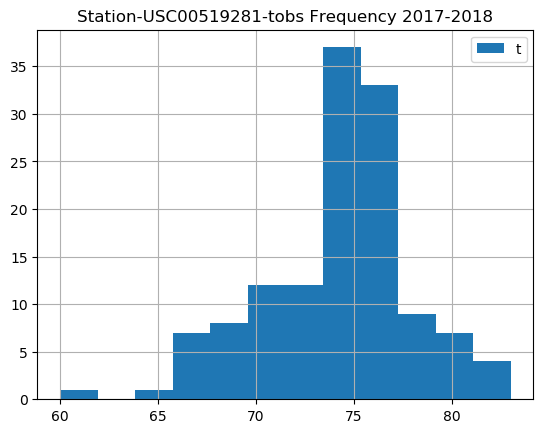

In [38]:
plt.hist(result_tobs, bins=12)
plt.title("Station-USC00519281-tobs Frequency 2017-2018")
plt.legend("tobs")
plt.grid()
plt.show()

In [92]:
# Temperature Analysis
# set the start and end date to get temperature data
start = "2017-04-01"
end = "2018-04-20"

temp = session.query(func.avg(Measurement.tobs),func.min(Measurement.tobs),func.max(Measurement.tobs)).\
    filter(Measurement.date>=start).\
    filter(Measurement.date<=end).all()
temp_df = pd.DataFrame(temp, columns=["avg","min","max"])
temp_df
description = temp_df.astype(float)

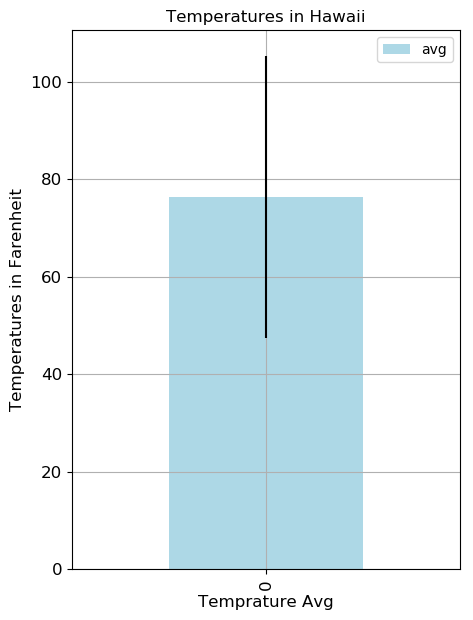

In [94]:
# plot the temperature chart 
yerr=description["max"]-description["min"]
temp_chart = description["avg"].plot.bar(yerr=yerr, title ="Temperatures in Hawaii", figsize=(5, 7), fontsize=12, color='lightblue', legend=True, grid=True)
temp_chart.set_xlabel("Temprature Avg", fontsize=12)
temp_chart.set_ylabel("Temperatures in Farenheit", fontsize=12)
plt.show()